# Make Moons example of how to use this REPO.

Config file. This repo uses ml_collection config files. The default setting are stored in "configs/default_sbi_configs.py". 

For this make moons task we use a variance exploding score based diffusion model, and the config file can be found at "configs/ve/make_moons_nonbench.py", wherein the parameters are set for the entire run. 

This repo has been optimized for score based diffusion models for 2D data, particularly in the context of SBI. The file datasets.py contains the scripts where you can add different dataset generators. We use the batch notation of:

    batch_dims = [jax.local_device_count(), additional_dim, per_device_batch_size] if additional_dim else [jax.local_device_count(), per_device_batch_size]

where additional_dim corrresponds to the number of jitted steps in the main script.

Custom datasets can be included via the function 

    generate_other_data()

# Running the training

You can run the training via the main_train_eval.py file. Where keywords that are required are 

    flags.mark_flags_as_required(["workdir", "config", "mode"])

Workdir is where the output of training will be stored, including tensorboard files and samples from the distribution.

# Learning the score.

The score model can be found at 

    models/simple_score.py

where we use a random fourier decomposition to handle the noise component. This model is overkill for this problem but we include it to illustrate how one would include a full noise conditional score model.

In [1]:
#!python main_train_eval.py --config=/Score_SBI/configs/ve/make_moons_nonbench.py --mode=train --workdir=/Score_SBI/output/makemoons

In [2]:
import os
os.getcwd()

'/Users/mattocallaghan/Score_SBI'

# Training visualization

We include a gif of samples in output folder as the training iterates. Moreover, we have a tensorboard file which can be viewed to understand the training.


In [7]:
file_paths

['output/makemoons/samples/iter_1000_host_0/sample.npz',
 'output/makemoons/samples/iter_2000_host_0/sample.npz',
 'output/makemoons/samples/iter_3000_host_0/sample.npz',
 'output/makemoons/samples/iter_4000_host_0/sample.npz',
 'output/makemoons/samples/iter_5000_host_0/sample.npz',
 'output/makemoons/samples/iter_6000_host_0/sample.npz',
 'output/makemoons/samples/iter_7000_host_0/sample.npz',
 'output/makemoons/samples/iter_8000_host_0/sample.npz',
 'output/makemoons/samples/iter_9000_host_0/sample.npz',
 'output/makemoons/samples/iter_10000_host_0/sample.npz',
 'output/makemoons/samples/iter_11000_host_0/sample.npz',
 'output/makemoons/samples/iter_12000_host_0/sample.npz',
 'output/makemoons/samples/iter_13000_host_0/sample.npz',
 'output/makemoons/samples/iter_14000_host_0/sample.npz',
 'output/makemoons/samples/iter_15000_host_0/sample.npz']

MovieWriter imagemagick unavailable; using Pillow instead.


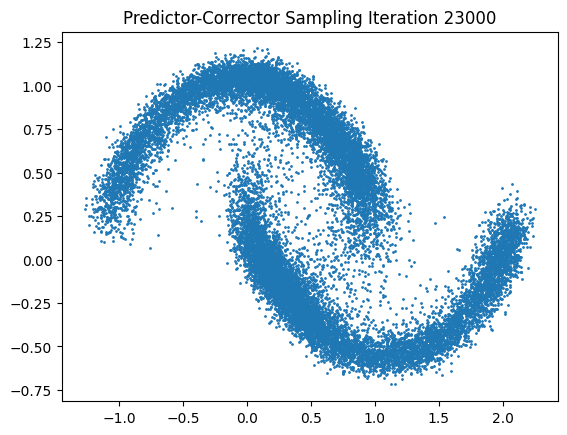

In [20]:
from matplotlib.animation import FuncAnimation
import glob
import numpy as np
import matplotlib.pyplot as plt

# List of file paths
file_paths = sorted(glob.glob('output/makemoons/samples/iter_*_host_0/sample.npz'), key=lambda x: int(x.split('_')[1]))

fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    samp = np.load(file_paths[frame])
    s = samp[samp.files[0]]
    #ax.scatter(X[:, 0], X[:, 1], cmap='viridis', s=1)

    ax.scatter(s[0, :, 0], s[0, :, 1], s=1)
    #ax.set_xlim(-1.5,2.5)
    #ax.set_ylim(-1.5,1.5)
    ax.set_title(f'Predictor-Corrector Sampling Iteration {frame * 1000 + 1000}')

ani = FuncAnimation(fig, update, frames=len(file_paths), repeat=True)
ani.save('output/makemoons/plots/pc_morph_plot.gif', writer='imagemagick')
plt.show()


In [30]:
import tensorflow as tf
import datetime
%load_ext tensorboard
%tensorboard --logdir "output/makemoons/tensorboard"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 41388), started 0:48:24 ago. (Use '!kill 41388' to kill it.)

Note, reference to "noise model" is redundent and will be removed.

Generate the real underling data.